In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from PIL import Image


In [2]:
# Load all the images of specific set
def load_images(path):
    images = []
    for file in os.listdir(path):
        img = Image.open(os.path.join(path, file)).convert('L')  #L -Luinance(balck and white)
        images.append(np.array(img)) # Converting images to 2d array 
    return np.array(images)

In [3]:
# Loading all the sets of images

all_faces = []
base_path = './Data/Dataset/att_faces/'

for i in range(1, 41):
    subject_path = os.path.join(base_path, f's{i}')
    subject_images = load_images(subject_path)
    all_faces.append(subject_images)

faces = np.vstack(all_faces)

print("Dataset shape:", faces.shape)
print(f'face = {faces}')

Dataset shape: (400, 112, 92)
face = [[[ 48  49  45 ...  56  56  54]
  [ 45  52  39 ...  52  50  51]
  [ 45  50  42 ...  48  53  50]
  ...
  [ 50  48  50 ...  45  46  46]
  [ 45  54  49 ...  46  47  47]
  [ 51  51  51 ...  47  46  46]]

 [[ 34  34  33 ...   1   1   1]
  [ 35  30  32 ...  38  47  39]
  [ 34  28  31 ...  55  59  49]
  ...
  [ 30  29  31 ...  35  37  41]
  [ 31  29  32 ...  42  34  39]
  [ 28  33  27 ...  37  40  33]]

 [[ 60  60  62 ...  40  53  46]
  [ 58  73  54 ...  34  50  51]
  [ 68  77  80 ...  36  50  49]
  ...
  [ 24 143 160 ...  34  33  33]
  [ 18 136 161 ...  36  36  31]
  [  9 111 168 ...  32  34  34]]

 ...

 [[129 127 133 ... 122 124 124]
  [130 128 126 ... 123 124 122]
  [127 126 132 ... 123 123 126]
  ...
  [ 69  72  71 ...  90  90  95]
  [ 70  69  71 ...  92  93  92]
  [ 74  69  72 ...  93  93  93]]

 [[125 119 124 ... 122 120 116]
  [121 124 118 ... 119 120 120]
  [122 125 122 ... 121 118 121]
  ...
  [ 85  93  82 ...  48  35  43]
  [ 87  92  85 ...  40 

Displaying set 8: 


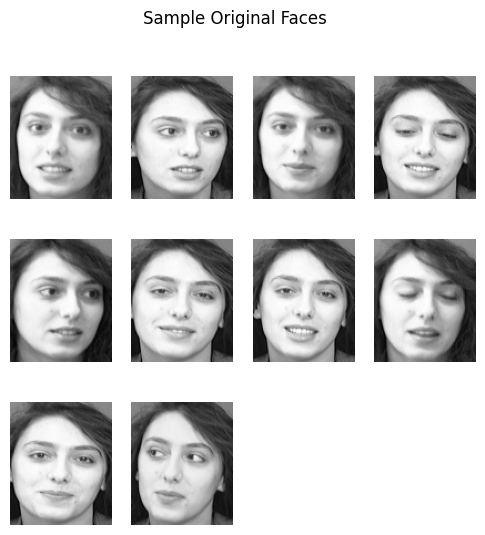

In [4]:
# Visualising the set of picture

plt.figure(figsize=(6,6))
image_set_number = 8    

start_index  = (image_set_number -1)*10
end_index = start_index + 10

print(f"Displaying set {image_set_number}: ")
    
for i in range(10):
    current_image_idx = start_index + i
    plt.subplot(3,4,i+1)
    plt.imshow(faces[current_image_idx], cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Original Faces')
plt.show()

In [5]:
#  Converting images into vectors 
# X - row : Each data/image, 
# X - col : different pixel values of subject in different data

n_samples, h, w = faces.shape
X = faces.reshape(n_samples, h * w)

print("Data matrix shape:", X.shape)
print(X)

Data matrix shape: (400, 10304)
[[ 48  49  45 ...  47  46  46]
 [ 34  34  33 ...  37  40  33]
 [ 60  60  62 ...  32  34  34]
 ...
 [129 127 133 ...  93  93  93]
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]]


In [6]:
# PCA - Mean centering
mean_face = np.mean(X, axis = 0)    # axis = 0 -> operate coloumn-wise : take the mean of each pixel across all images
X_centered = X - mean_face          # Determine deviance of each pixel value from the mean (Eg: 133 - 129.3 = 3.7), need to shift the center to origin

# print(f'Mean face = {mean_face}')
# print(f'X = {X}')
# print(f'X_centered = {X_centered}')

In [7]:
# Applying SVD 
    # Vt = eigenfaces
    # S = singular values
    # Eigenvalues = S^2/(n-1)

U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# print(f'U = {U}')
# print(f'S = {S}')
print(f'Number of Eigen faces = {Vt.shape}')
print(f'Vt = {Vt}')

Number of Eigen faces = (400, 10304)
Vt = [[ 0.00212508  0.00211277  0.0021425  ...  0.00704006  0.00639096
   0.00734479]
 [ 0.01468515  0.01461394  0.01463186 ... -0.01056104 -0.0097007
  -0.00881892]
 [ 0.01992949  0.0200092   0.01983852 ...  0.01416368  0.01439436
   0.01487489]
 ...
 [ 0.00724583  0.00056252 -0.00275106 ...  0.00457939  0.00014567
   0.02136343]
 [ 0.00197647 -0.00245204  0.00035508 ...  0.0095722   0.00997751
   0.01056966]
 [ 0.02305126  0.01785691 -0.02141557 ... -0.00646946  0.0069341
  -0.01081238]]


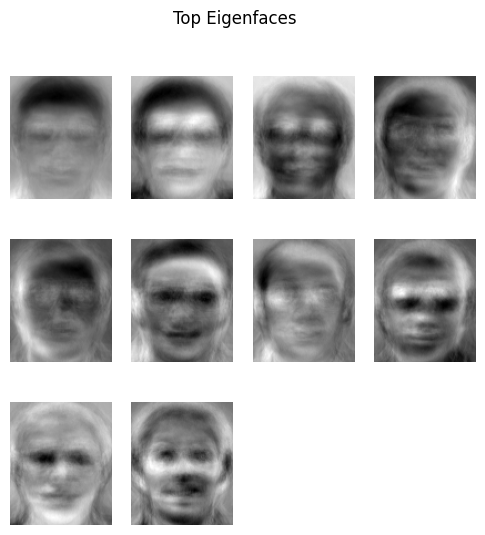

In [8]:
# Visualize eigenfaces
plt.figure(figsize=(6,6))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(Vt[i].reshape(h, w), cmap='gray')
    plt.axis('off')
plt.suptitle("Top Eigenfaces")
plt.show()

In [9]:
# Reconstruction function 

def reconstruct_image(x, mean, Vt, k):
    return mean + x @ Vt[:k].T @ Vt[:k]


In [10]:
def pca_reconstruct(U, S, Vt, mean_image, k):
    """
    Reconstructs image using first k PCA components.
    """
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vk = Vt[:k, :]

    X_reconstructed = Uk @ Sk @ Vk + mean_image
    return X_reconstructed

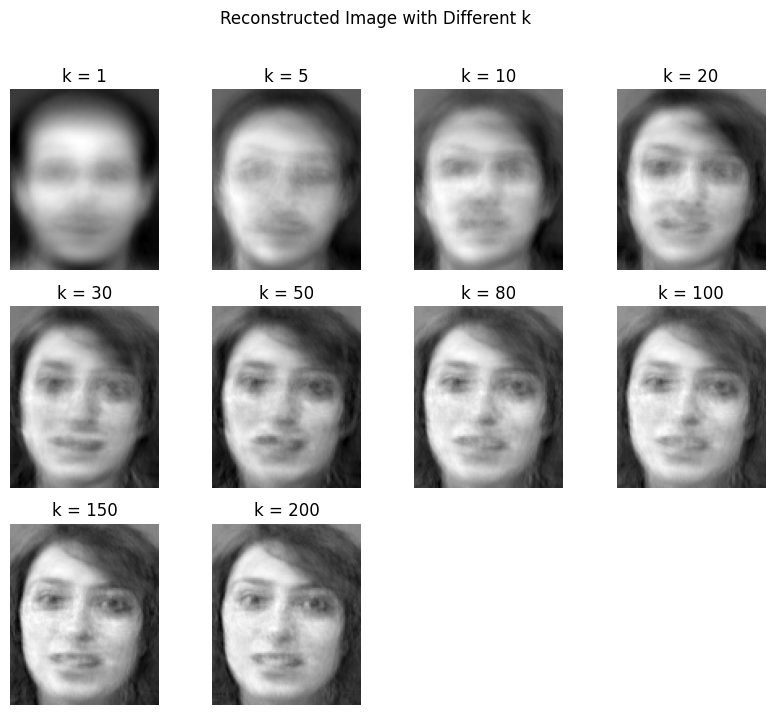

In [11]:
# Comparing the different k values 
k_values = [1,5,10,20,30,50,80,100,150,200]

set_number = 8

img_index = (set_number - 1) * 10
plt.figure(figsize=(10,8))

for i, k in enumerate(k_values):
    recon = reconstruct_image(X_centered[img_index], mean_face, Vt, k)
    plt.subplot(3,4,i+1)
    plt.imshow(recon.reshape(h,w), cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("Reconstructed Image with Different k")
plt.show()


# Analysis
<ol>
    <li> Compression Ratio 
        <ul>
            <li> Defined by :
                Compression Ratio= Compressed storage / Original storage​
            <li> Higher ration -> better compression
            <li> Trade-off with image quality 
        </ul>
    <li> Mean Squared Error (MSE)
        <ul>
            <li> Measures how much information is lost during reconstruction
            <li> Lower MSE → better reconstruction
            <li> MSE decreases as k increases
        </ul>
</ol>




In [12]:
# Function to compute MSE and Compression ratio
data = faces.shape
N = data[1]
d = data[2]

def compute_mse(original, reconstruct_image):
    return np.mean((original - reconstruct_image)**2)

def compute_compression_ratio(k):
    original_size = N*d
    compressed_size = k*(N+d+1)
    return original_size / compressed_size

In [13]:
def pca_reconstruct(U, S, Vt, mean_image, k):
    """
    Reconstructs image using first k PCA components.
    """
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vk = Vt[:k, :]

    X_reconstructed = Uk @ Sk @ Vk + mean_image
    return X_reconstructed

In [14]:
# Compute metric for different k
mse_values = [] 
compression_ratios = []
X_Original = X

for k in k_values:
    recon = pca_reconstruct(U, S, Vt, mean_face, k)
    mse = compute_mse(X_Original, recon)
    cr = compute_compression_ratio(k)

    mse_values.append(mse)
    compression_ratios.append(cr)

print(f'Mse Values are: {mse_values}')
print(f'Compress ratios = {compression_ratios}')

Mse Values are: [np.float64(1279.0471049643832), np.float64(806.5437879254187), np.float64(621.7159322238383), np.float64(465.49908583073477), np.float64(383.0128547414463), np.float64(285.56757823010275), np.float64(205.49580646946032), np.float64(169.86645934480467), np.float64(109.90974968641858), np.float64(70.4881514760893)]
Compress ratios = [50.26341463414634, 10.052682926829268, 5.026341463414634, 2.513170731707317, 1.6754471544715448, 1.0052682926829268, 0.6282926829268293, 0.5026341463414634, 0.3350894308943089, 0.2513170731707317]


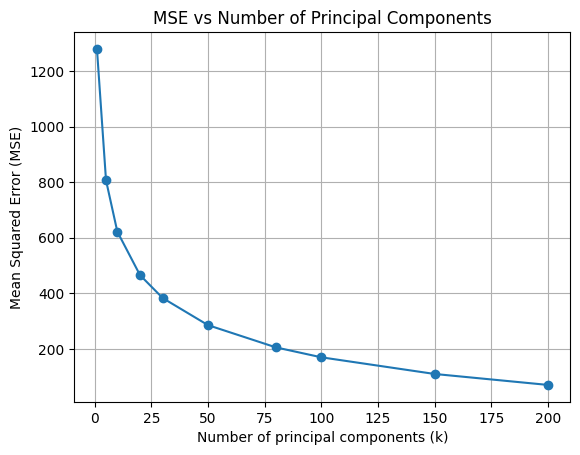

In [15]:
# MSE Vs Number of Components k

plt.figure()
plt.plot(k_values, mse_values, marker='o')
plt.xlabel("Number of principal components (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs Number of Principal Components")
plt.grid(True)
plt.show()


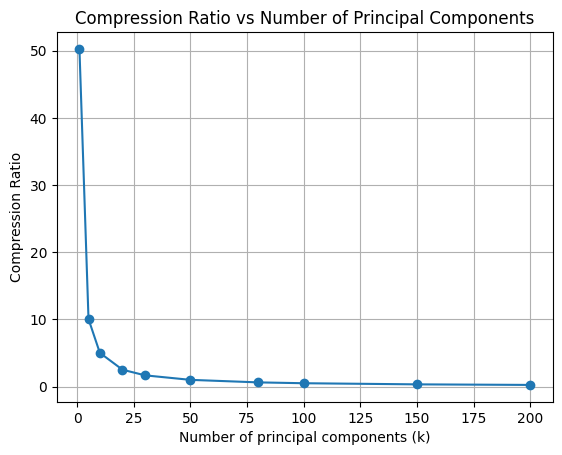

In [16]:
# Compression Ratio vs Number of Components 𝑘
plt.figure()
plt.plot(k_values, compression_ratios, marker='o')
plt.xlabel("Number of principal components (k)")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs Number of Principal Components")
plt.grid(True)
plt.show()
